<a href="https://colab.research.google.com/github/jordannemirovsky/DS1002/blob/main/Apr12HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capital Asset Pricing Model (CAPM)

### Assignment due Monday 22 April at noon

---

2.  Load the packages and data.  (Note that the following code chunk also hard-codes the constant $R_f$.)  
The data lives in the file `capm_market_data` in the `data` folder on the `GitHub` site.

In [13]:
#load numpy and pandas packages
import numpy as np
import pandas as pd

#get data
capm = pd.read_csv('capm_market_data.csv')

#risk-free Treasury rate
R_f = 0.0175 / 252

3.  Look at some records.  
SPY is something that mirrors the S&P 500 ("the market").  
AAPL is the code for Apple stock.  
The values are closing prices, adjusted for splits and dividends.

In [14]:
#looking at the first 10 rows
print(capm.head(10))

         date  spy_adj_close  aapl_adj_close
0  2020-01-02     321.555786      298.829956
1  2020-01-03     319.120911      295.924713
2  2020-01-06     320.338379      298.282715
3  2020-01-07     319.437653      296.879883
4  2020-01-08     321.140106      301.655548
5  2020-01-09     323.317627      308.062988
6  2020-01-10     322.387207      308.759399
7  2020-01-13     324.604401      315.355865
8  2020-01-14     324.109497      311.097534
9  2020-01-15     324.841919      309.764313


4.  Drop the date column

In [15]:
capm = capm.drop(columns=['date'])

In [17]:
#making sure column was dropped
print(capm.head(10))

   spy_adj_close  aapl_adj_close
0     321.555786      298.829956
1     319.120911      295.924713
2     320.338379      298.282715
3     319.437653      296.879883
4     321.140106      301.655548
5     323.317627      308.062988
6     322.387207      308.759399
7     324.604401      315.355865
8     324.109497      311.097534
9     324.841919      309.764313


5.  Compute daily returns (percentage changes in price) for both SPY and AAPL.
(Be sure to drop the first row of NaN.)  
Hint: pandas has functions to easily do this.  
Print the first 5 rows of returns.


In [18]:
returns = capm[['spy_adj_close', 'aapl_adj_close']].pct_change()

returns = returns.dropna()

print(returns.head())

   spy_adj_close  aapl_adj_close
1      -0.007572       -0.009722
2       0.003815        0.007968
3      -0.002812       -0.004703
4       0.005330        0.016086
5       0.006781        0.021241


6.  Save the SPY and AAPL returns into separate numpy arrays.  
Print the first five values from each of the two arrays.


In [21]:
#SPY
spy_returns = returns['spy_adj_close'].values
print(spy_returns[:5])

[-0.00757217  0.00381507 -0.0028118   0.00532953  0.00678059]


In [22]:
#AAPL
aapl_returns = returns['aapl_adj_close'].values
print(aapl_returns[:5])

[-0.00972206  0.00796825 -0.00470303  0.01608619  0.02124092]


7.  Make arrays (one for SPY, one for AAPL) containing the *excess* returns by subtracting the constant $R_f$ from the returns.  
(Recall that $R_f$ is the "risk-free rate" meaning essentially that you could earn this much in interest if you didn't invest in anything.)  
Print the LAST five excess returns from both SPY and AAPL numpy arrays.

In [23]:
#SPY
spy_excess_returns = spy_returns - R_f
print(spy_excess_returns[-5:])

[-0.00576237  0.0101411  -0.00872841  0.01288957  0.00911779]


In [24]:
#AAPL
aapl_excess_returns = aapl_returns - R_f
print(aapl_excess_returns[-5:])

[ 0.00423088  0.00167981 -0.00468264  0.01647898  0.00680788]


8. Make a scatterplot with SPY excess returns on the $x$-axis and AAPL excess returns on the $y$-axis.  
If you need it, here is the [Matplotlib documentation]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

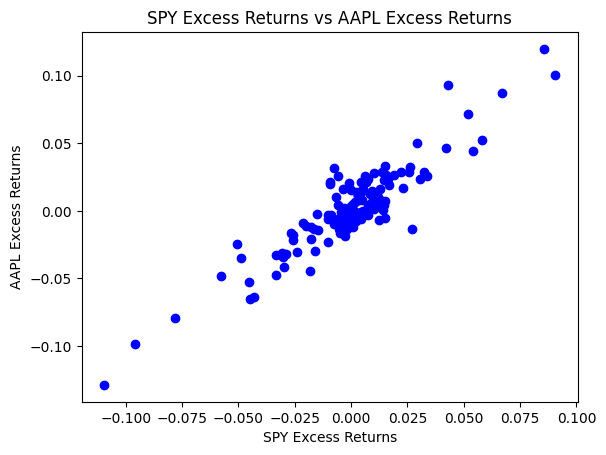

In [26]:
import matplotlib.pyplot as plt

plt.scatter(spy_excess_returns, aapl_excess_returns, color='blue')
plt.xlabel('SPY Excess Returns')
plt.ylabel('AAPL Excess Returns')
plt.title('SPY Excess Returns vs AAPL Excess Returns')
plt.show()

The value of $\beta_A$ is computed from the arrays you built in problem 7, via a formula that uses some statistical functions called the "variance" and the "covariance."

Any individual 1-d array of numbers has a variance, which you can compute using `numpy`'s function `var()` (documented [here](https://numpy.org/doc/stable/reference/generated/numpy.var.html)).  This is a number.

If you have two 1-d arrays of the same length, they collectively have something called a covariance which `numpy` also can compute using `cov()` (documented [here](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)).

The covariance is also a number, but look at what happens when you send two 1-d arrays to `cov()`: it returns a $2\times 2$ matrix.  (Try it!)  The covariance we are looking for is the number that lives in both the top right and the bottom left of this matrix.  (Those two numbers should be the same.)  The top left and bottom right entries of the covariance matrix also have meaning, but we don't need them.



In [27]:
#send two 1-d arrays to cov()
x = np.array([2, 4, 6, 8, 10])
y = np.array([1, 3, 5, 7, 19])

cov_matrix = np.cov(x, y)

print(cov_matrix)

[[10. 20.]
 [20. 50.]]


9. Use `numpy` functions as described above to compute the estimate of $\beta_A$, using the following formula:  
\begin{aligned} \beta_A= \frac{ \text{cov}(A,SP) }{ \text{var}(SP) } \end{aligned}
In our context, A will be the 1-d array you made in problem 7 for AAPL, and SP will be the 1-d array you made for SPY.

In [36]:
#computing the covariance matrix
cov_matrix = np.cov(aapl_excess_returns, spy_excess_returns)

#numerator
cov_a_sp = cov_matrix[0, 1]

#denominator
var_sp = np.var(spy_excess_returns)

#beta estimate calculation
beta_aapl = cov_a_sp / var_sp

print(beta_aapl)

1.0956172644197222


You should have found that the beta estimate is greater than one.  
This means that the volatility of AAPL stock, given the data, and according to this particular (flawed) model,
is higher than the volatility of the S&P 500.

Bonus:  Is this something you can see on the plot you made?



Bonus answer: It is hard to say a definitive yes to this question as the points are clumped together. However, there seems to be a positive relationship between SPY and AAPL excess returns. So we can assume that when SPY is experiencing high volatility, so is AAPL and vice versa. Because the beta estimate is greater than one but only slightly, my guess is the points reflect a similar situation in which the volatility of AAPL may be higher than SPY but only slightly.

Finally, let's look at how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

This is called *jackknifing*.



10. Write a function called `beta_sensitivity()` with these specs:

- take numpy arrays `x` and `y` as inputs
- outputs a list of tuples, so that each tuple contains (observation row dropped, beta estimate)

Hint: **np.delete(x, i).reshape(-1,1)** will delete observation i from array x, and make it a column vector

In [43]:
def beta_sensitivity(x, y):
    """
    Calculate sensitivity of beta estimates.

    Args:
    x: input array.
    y: input array.

    Returns:
    list of tuples each containing (observation row dropped, beta estimate).
    """
    beta_sensitivity_list = []
    for i in range(len(x)):
        x_temp = np.delete(x, i).reshape(-1, 1)
        y_temp = np.delete(y, i).reshape(-1, 1)

        #beta estimate calculation
        cov_matrix = np.cov(y_temp.flatten(), x_temp.flatten(), ddof=0)
        cov_xy = cov_matrix[0, 1]
        var_x = np.var(x_temp.flatten(), ddof=0)
        beta_estimate = cov_xy / var_x

        beta_sensitivity_list.append((i, beta_estimate))

    return beta_sensitivity_list

11. Call `beta_sensitivity()` on the arrays A and SP from earlier and print the first ten tuples of output.

In [44]:
sensitivity_list = beta_sensitivity(spy_excess_returns, aapl_excess_returns)

for sensitivity in sensitivity_list[:10]:
    print(sensitivity[0], sensitivity[1])

0 1.0871485760197404
1 1.0873812467606678
2 1.087318593588072
3 1.0870279695294356
4 1.0866731043986635
5 1.0875498483334438
6 1.0866602713621312
7 1.0871698778060463
8 1.0876109961559735
9 1.0873303135321322
